#Exploratory Analysis -- Yelp

## I. Problem Statement & Background

Due to Yelp’s ability to reach tons of customers and attract crowds of foot traffic, restaurants are always trying to optimize their yelp ratings. However, what are the drivers behind yelp ratings? What separates a two star restaurant from a four star restaurant? Does ambiance contribute to the rating? What about distance from the geographic city center? There are a variety of features that could potentially contribute to businesses’ Yelp rating, and we want to discover what those are and to what degree they matter. At the end we will look at multiple factors and see what correlates most highly to a positive restaurant rating. 

What we do know is: Put Sources Here

## II. Sources Intend For Use

In [2]:
import json
import pandas as pd
import sys
import os
import numpy as np
%matplotlib inline

So lets first load the biz data set and since we are only interested in restaurants, lets filter out all businesses that are not restaurant categories.

In [3]:
#Load Biz Dataset into DF
biz_data = []
biz_fn = 'yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json'
with open(biz_fn) as data_file:
    for line in data_file:
        biz_data.append(json.loads(line))
biz_df = pd.DataFrame(biz_data)

In [4]:
#filtering businesses into restaurants
category_csv = 'restaurantcategories.csv'
all_categories = []
restaurants = []
with open(category_csv) as categories:
    for line in categories:
        all_categories.append(line)
biz_dict = biz_df.to_dict()
all_categories = all_categories[0].split('\r')
for index in biz_dict['categories'].keys():
    if len(biz_dict['categories'][index]) == 0:
        for col in biz_dict.keys():
                del biz_dict[col][index] 
    elif len(biz_dict['categories'][index]) > 0:
        allInCats = True
        for elem in biz_dict['categories'][index]:
            if elem not in all_categories:
                allInCats = False
                break;
        if not allInCats:
            for col in biz_dict.keys():
                del biz_dict[col][index]        
res_df = pd.DataFrame(biz_dict);res_df
res_df.index = range(len(res_df))
res_df

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",wJr6kSA5dchdgOdwH6dZ2w,"[Burgers, Breakfast & Brunch, American (Tradit...",Carnegie,"2100 Washington Pike\nCarnegie, PA 15106","{u'Monday': {u'close': u'02:00', u'open': u'08...",40.387732,-80.092874,Kings Family Restaurant,[],True,8,3.5,PA,business
1,"{u'Alcohol': u'none', u'Noise Level': u'averag...",b9WZJp5L1RZr4F1nxclOoQ,"[Breakfast & Brunch, Restaurants]",Carnegie,"1073 Washington Ave\nCarnegie, PA 15106","{u'Monday': {u'close': u'14:30', u'open': u'06...",40.396744,-80.084800,Gab & Eat,[],True,38,4.5,PA,business
2,"{u'Take-out': True, u'Price Range': 1, u'Outdo...",zaXDakTd3RXyOa7sMrUE1g,"[Cafes, Restaurants]",Carnegie,"202 3rd Ave\nCarnegie\nCarnegie, PA 15106",{},40.404638,-80.089985,Barb's Country Junction Cafe,[Carnegie],True,5,4.0,PA,business
3,"{u'Take-out': True, u'Accepts Credit Cards': T...",rv7CY8G_XibTx82YhuqQRw,[Restaurants],Carnegie,"Raceway Plz\nCarnegie, PA 15106",{},40.386891,-80.093704,Long John Silver's,[],True,3,3.5,PA,business
4,"{u'Take-out': True, u'Alcohol': u'none', u'Noi...",SQ0j7bgSTazkVQlF5AnqyQ,"[Chinese, Restaurants]",Carnegie,"214 E Main St\nCarnegie\nCarnegie, PA 15106",{},40.408343,-80.084861,Don Don Chinese Restaurant,[Carnegie],True,8,2.5,PA,business
5,"{u'Take-out': True, u'Accepts Credit Cards': T...",wqu7ILomIOPSduRwoWp4AQ,"[Breakfast & Brunch, American (Traditional), R...",Pittsburgh,"2180 Greentree Rd\nPittsburgh, PA 15220",{},40.391255,-80.073426,Denny's,[],True,7,4.0,PA,business
6,"{u'Take-out': True, u'Accepts Credit Cards': T...",P1fJb2WQ1mXoiudj8UE44w,"[Restaurants, Italian]",Carnegie,"200 E Main St\nCarnegie\nCarnegie, PA 15106","{u'Monday': {u'close': u'22:00', u'open': u'11...",40.408257,-80.085458,Papa J's,[Carnegie],True,46,3.5,PA,business
7,"{u'Take-out': True, u'Accepts Credit Cards': T...",PK6aSizckHFWk8i0oxt5DA,"[Burgers, Fast Food, Restaurants]",Homestead,"400 Waterfront Dr E\nHomestead\nHomestead, PA ...",{},40.412086,-79.910032,McDonald's,[Homestead],True,5,2.0,PA,business
8,"{u'Attire': u'casual', u'Parking': {u'garage':...",sRqB6flj3GtTZIZJQxf_oA,[Restaurants],Homestead,"285 Waterfront Dr E\nHomestead\nHomestead, PA ...",{},40.411692,-79.912343,Eat'n Park Hospitality Group,[Homestead],True,3,2.5,PA,business
9,"{u'Take-out': True, u'Accepts Credit Cards': T...",6ilJq_05xRgek_8qUp36-g,"[Burgers, Fast Food, Restaurants]",Munhall,"650 E Waterfront Dr\nHomestead\nMunhall, PA 1...","{u'Monday': {u'close': u'00:00', u'open': u'00...",40.413496,-79.904456,Steak 'n Shake,[Homestead],True,36,2.0,PA,business


So now we are interested in looking at the distribution of restaurants pertaining to certain catagories. First we need to flatten this data frame by generating duplicate rows for the categories column which stores a list. Then we can generate a historgram.

In [ ]:
def reindex(df):
    df.index = range(len(df))
    return df

res_df_flat = pd.DataFrame(columns=res_df.columns)
duplicates = [res_df_flat]
for row_index in range(len(res_df.index)):
    target_row = reindex(res_df.ix[[row_index]])
    target_categories = list(target_row['categories'])[0]
    if len(target_categories) == 1 and target_categories[0] == 'Restaurants':
        target_categories[0] = 'Generic Restaurant'
    for target_category in target_categories:
        if target_category != 'Restaurants':
            duplicate_row = target_row.copy(deep=True)
            duplicate_row['categories'][0] = target_category
            duplicates.append(duplicate_row)
print("Appended")
res_df_flat = reindex(pd.concat(duplicates))
res_df_flat

In [ ]:
res_df_flat.to_csv('flattened_res_reviews.csv')
res_df_flat.hist(column='categories')

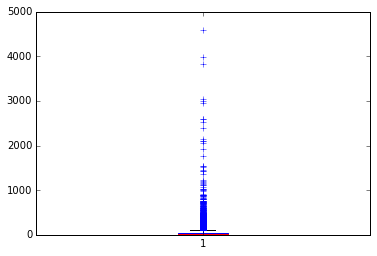

In [12]:
#box and whisker plots, summary statistics of num reviews
from pylab import *
data = []
for key in numReviews.keys():
    for i in range(0,numReviews[key]):
        data.append(key)

boxplot(data)
figure()
show()

In [13]:
#Load Checkin Dataset into DF
checkin_data = []
checkin_fn = 'yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_checkin.json'
with open(checkin_fn) as data_file:
    for line in data_file:
        checkin_data.append(json.loads(line))
checkin_df = pd.DataFrame(checkin_data)

In [14]:
#Load review dataset into df
review_data = []
review_fn = 'yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json'
with open(review_fn) as data_file:
    for line in data_file:
        review_data.append(json.loads(line))
review_df = pd.DataFrame(review_data)

In [15]:
#Load tip dataset into df
tip_data = []
tip_fn = 'yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_tip.json'
with open(tip_fn) as data_file:
    for line in data_file:
        tip_data.append(json.loads(line))
tip_df = pd.DataFrame(tip_data)

In [16]:
#Load user dataset into df
user_data = []
user_fn = 'yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_user.json'
with open(user_fn) as data_file:
    for line in data_file:
        user_data.append(json.loads(line))
user_df = pd.DataFrame(user_data)

## Review Summary Stats

So we are interested in the summary stats of yelp reviews. To start let us first get an idea of what the distribution of reviews looks like.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x39ee86750>]], dtype=object)

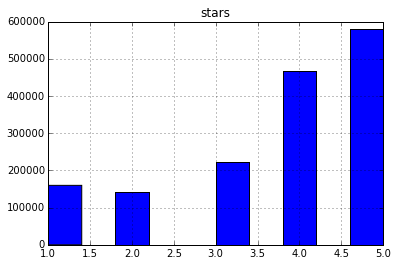

In [26]:
review_df.hist(column='stars')

So this distribution shows that amongst people who actually write reviews there is a pretty heavy skew towards 4-5 star ratings which is pretty intersting. Now let us see if this corresponds to the rating distribution of restaurants.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x39d2b3390>]], dtype=object)

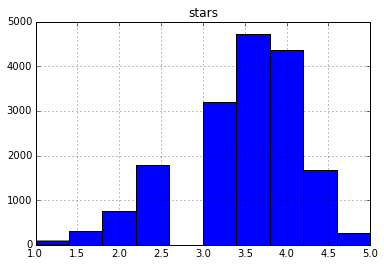

In [42]:
res_df.hist(column='stars')

So this is a much nicer distribution. This distribution is skewed to the right which seems to give some evidence that people tend to give nicer reviews. 

However, let us first get some summary stats of this biz distribution and of the review distribution.

In [43]:
res_df['stars'].describe()

count    17163.000000
mean         3.436054
std          0.737660
min          1.000000
25%          3.000000
50%          3.500000
75%          4.000000
max          5.000000
Name: stars, dtype: float64

In [29]:
review_df['stars'].describe()

count    1569264.000000
mean           3.742656
std            1.311468
min            1.000000
25%            3.000000
50%            4.000000
75%            5.000000
max            5.000000
Name: stars, dtype: float64

So looking at the summary stats, it is pretty clear that these are decent distributions where more of the mass is clustered around the mean for the average biz stars versus individual reviews. Now Let us break this down by category which will be pretty useful.

[4.0, 4.0, 2.5, 5.0, 3.0, 3.5, 2.0, 3.0, 5.0, 4.5, 2.5, 5.0, 4.0, 4.0, 5.0, 4.0, 4.5, 4.0, 2.0, 5.0, 5.0, 1.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 4.5, 5.0, 5.0, 3.5, 4.5, 5.0]


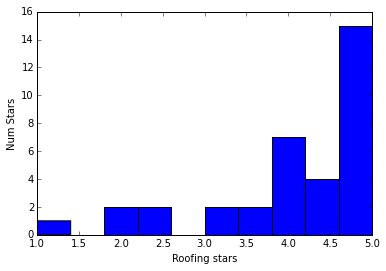

[4.0, 1.0, 2.5, 3.5, 4.0, 4.0, 2.5, 5.0, 2.5, 3.5, 2.5, 4.0, 4.5, 3.5, 1.5, 2.5, 5.0, 3.0, 4.0, 5.0, 4.0, 4.0, 3.5, 5.0, 1.5, 2.5, 4.5, 2.0, 5.0, 3.5, 3.0, 3.5, 3.0, 3.5, 3.0, 3.0, 3.5, 2.0, 4.5, 4.0, 1.0, 3.0, 4.5, 1.0, 3.5, 5.0]


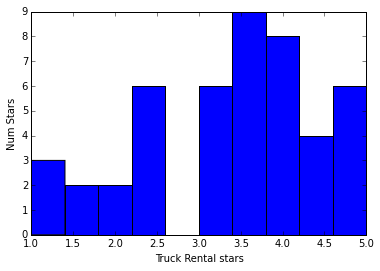

[2.5, 2.0, 5.0, 3.5, 3.5, 3.5, 3.5, 3.0, 3.5, 3.5, 3.0, 3.5, 3.5, 2.5, 2.5, 3.5, 4.5, 4.0, 3.0, 3.5, 3.0, 2.5, 3.0, 2.5, 3.5, 3.0, 3.5, 2.0, 4.0, 2.5, 4.0, 2.5, 1.5, 5.0, 3.0, 2.0, 3.5, 3.0, 3.0, 2.5, 4.0, 4.0, 2.5, 3.0, 3.0, 3.5, 2.5, 4.0, 2.0, 2.5, 3.5, 3.5, 3.0, 2.0, 3.5, 4.0, 3.0, 3.5, 3.5, 3.5, 3.0, 3.5, 3.0, 4.0, 4.5, 3.5, 3.5, 2.0, 3.5, 3.5, 2.5, 3.5, 3.5, 2.0, 2.0, 2.5, 5.0, 3.5, 3.0, 4.0, 3.5, 3.5, 3.0, 3.5, 3.0, 2.5, 3.5, 2.0, 2.5, 3.0, 4.5, 2.0, 4.0, 4.0, 2.0, 2.5, 1.5, 1.5, 4.5, 4.0, 2.5, 3.5, 3.0, 4.0, 3.0, 2.5, 5.0, 3.5, 3.5, 3.0, 3.0, 2.5, 2.0, 4.0, 3.5, 3.5, 3.5, 2.5, 3.5, 1.5, 2.5, 4.0, 3.0, 2.0, 4.0, 2.5, 2.0, 3.5, 3.5, 4.0, 4.5, 3.5, 4.5, 2.0, 2.5, 5.0, 4.5, 3.0, 3.0, 3.5, 3.0, 1.0, 2.5, 2.0, 3.0, 1.5, 2.0, 3.5, 3.5, 4.5, 4.0, 3.0, 3.5, 5.0, 2.5, 2.0, 3.0, 2.0, 1.5, 3.0, 2.0, 3.5, 3.5, 4.5, 3.5, 4.0, 3.5, 3.0, 3.0, 4.0, 3.5, 3.5, 3.5, 2.0, 4.0, 4.0, 4.5, 2.5, 2.0, 3.5, 3.0, 3.5, 2.5, 4.5, 3.0, 3.0, 3.5, 2.5, 3.0, 3.5, 4.0, 3.5, 3.0, 2.0, 3.5, 4.5, 2.5, 4.0, 4.0, 3.0,

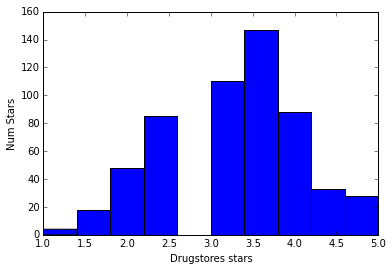

[2.5, 4.0, 5.0, 2.0, 1.5, 4.0, 1.5, 3.5, 3.5, 3.5, 3.5, 3.0, 3.5, 3.0, 4.0, 4.0, 4.5, 2.5, 4.0, 3.5, 4.0, 2.5, 1.0, 4.0, 4.0, 3.5, 2.5, 1.5, 3.5, 4.0, 4.0, 2.5, 2.5, 2.0, 4.5, 4.5, 3.0, 4.5, 3.5, 3.5, 4.5, 3.5, 2.5, 3.0, 3.0, 4.5, 1.5, 5.0, 3.5, 2.0, 2.5, 1.0, 3.5, 5.0, 4.5, 2.0, 4.0, 3.0, 4.5, 3.0, 2.5, 2.5, 5.0, 3.5, 4.5, 3.0, 5.0, 4.5, 2.0, 3.0, 2.5, 2.5, 3.5, 4.0, 2.5, 3.0, 2.5, 2.0, 3.5, 3.5, 4.0, 5.0, 3.5, 3.5, 4.0, 3.0, 3.5, 3.5, 3.5, 3.0, 5.0, 2.5, 3.5, 4.5, 3.5, 4.0, 3.0, 2.5, 3.5, 4.0, 3.5, 3.5, 4.5, 3.5, 3.5, 4.5, 3.5, 4.5, 4.0, 4.0, 3.5, 3.0, 4.0, 3.5, 3.5, 4.0, 1.5, 3.0, 2.5, 4.5, 4.5, 4.5, 3.5, 2.0, 2.5, 2.5, 2.0, 3.5, 3.0, 2.5, 4.0, 1.0, 4.0, 3.5, 4.0, 3.5, 3.0, 3.5, 4.0, 3.5, 5.0, 2.5, 3.0, 2.0, 3.0, 2.0, 4.0, 3.5, 1.0, 4.5, 4.0, 3.5, 3.0, 3.5, 4.0, 2.5, 4.5, 1.5, 5.0, 2.5, 4.5, 3.0, 3.5, 1.5, 2.5, 1.5, 3.0, 3.5, 3.5, 4.5, 3.5, 2.5, 2.5, 4.0, 2.5, 3.0, 1.5, 4.0, 2.5, 4.5, 1.0, 2.5, 1.0, 2.5, 2.5, 5.0, 4.0, 4.5, 3.5, 4.5, 2.5, 2.5, 3.5, 4.5, 4.0, 2.5, 2.5, 4.0, 3.5, 3.5,

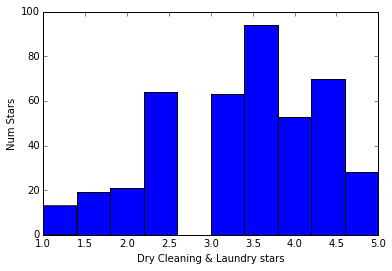

[3.0, 3.5, 3.5, 3.0, 3.5, 3.0, 3.5, 2.5, 2.5, 3.0, 3.5, 3.5, 3.5, 2.5, 2.5, 4.0, 3.0, 2.5, 2.5, 3.5, 4.0, 3.5, 3.5, 3.0, 2.0, 1.5, 2.5, 4.0, 3.5, 3.0, 3.0, 3.0, 3.0, 3.5, 4.0, 3.5, 3.5, 2.5, 4.0, 3.0, 4.0, 3.0, 2.5, 3.0, 3.0, 4.0, 3.5, 3.5, 3.0, 3.5, 2.5, 3.0, 3.0, 1.5, 3.0, 3.0, 3.0, 2.5, 2.5, 2.5, 2.0, 2.5, 2.5, 3.5, 3.0, 2.5, 3.0, 3.5, 2.5, 1.5, 3.0, 3.0, 3.5, 1.5, 3.0, 3.0, 4.0, 3.5, 3.0, 2.5, 2.0, 2.0, 3.0, 2.5, 4.0, 3.5, 3.0, 3.0, 3.0, 1.5, 3.5, 3.0, 2.0, 3.5, 4.0, 2.5, 3.5, 3.0, 3.0, 2.5, 3.5, 3.5, 3.5, 3.0, 3.5, 2.0, 2.0, 2.5, 2.5, 3.5, 3.5, 4.0, 3.5, 3.0, 3.0, 4.0, 4.0, 3.0, 1.5, 3.0, 2.0, 2.0, 3.5, 3.0, 3.5, 3.5, 3.0, 3.0, 3.0, 3.0, 3.5, 3.5, 3.0, 2.5, 2.0, 2.5, 4.0, 1.5, 3.0, 4.0, 3.0, 3.5, 3.0, 3.0, 2.5, 4.0, 3.0, 3.5, 3.0, 3.5, 3.5, 3.0, 4.0, 2.5, 3.5, 2.5, 3.0, 2.0, 3.0, 3.5, 4.0, 4.0, 2.5, 2.5, 2.5, 2.5, 1.5, 2.5, 4.0, 4.0, 3.0, 2.0, 2.0, 3.5, 1.5, 3.0, 2.5, 2.5, 3.5, 3.5, 3.5, 2.5, 3.0, 3.0, 2.5, 2.0, 2.0, 2.5, 2.5, 4.0, 2.0, 2.5, 3.5, 4.0, 3.0, 3.0, 3.0, 3.5, 3.0, 2.5,

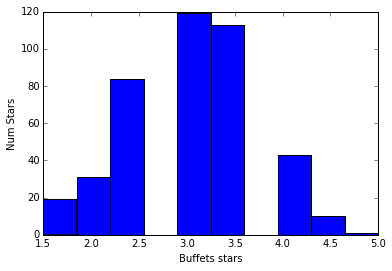

[4.5, 2.5, 4.0, 3.5, 3.0, 4.0, 4.5, 3.0, 4.0, 4.0, 3.5, 4.5, 3.5, 5.0, 3.5, 4.5, 4.0, 5.0, 4.0, 2.5, 5.0, 3.5, 4.5, 4.0, 4.0, 3.5, 4.5, 4.0, 4.0, 1.0, 4.5]


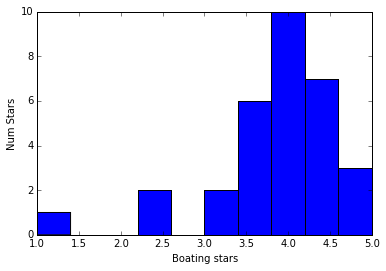

[5.0, 2.5, 5.0, 5.0, 3.0, 4.5, 4.0, 4.5, 3.5, 3.5, 3.0, 2.5, 3.5, 2.5, 4.0, 1.0, 3.5, 1.5, 4.5, 5.0, 3.5, 4.5, 1.0, 2.0, 4.0, 4.0, 5.0, 3.5, 3.5, 3.5, 5.0, 2.5, 4.5, 5.0, 4.5, 5.0, 3.5, 4.5, 3.0, 3.5, 4.0, 2.0, 4.5, 3.5, 3.0, 3.0, 5.0, 5.0, 3.5, 2.5, 4.5, 5.0, 4.5, 5.0, 5.0, 3.0, 4.0, 4.5, 5.0, 4.5, 2.0, 2.0, 3.5, 5.0, 3.5, 5.0, 5.0, 4.0, 4.5, 5.0, 3.0, 5.0, 3.0, 4.5, 5.0, 4.5, 4.5, 4.0, 4.0, 3.5, 4.5, 4.0, 3.0, 4.5, 4.0, 4.5, 2.5, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0]


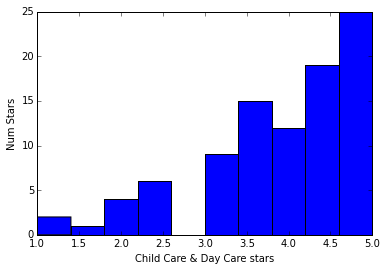

[4.5, 5.0, 2.5, 5.0, 5.0, 4.5, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 4.5, 3.0, 2.5, 1.5, 3.5, 3.5, 3.5, 4.0, 5.0, 5.0, 4.5, 5.0, 4.0]


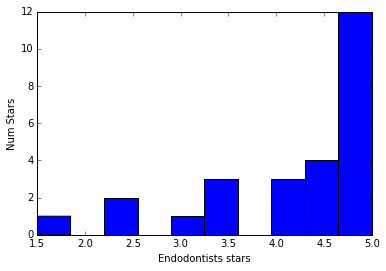

[4.0, 4.0, 3.0, 5.0, 3.5, 3.5, 3.5, 3.5, 4.5, 4.0, 2.5, 3.0, 4.5, 4.0, 3.5, 2.5, 4.0, 3.5, 3.5, 2.5, 3.0, 4.0, 4.0, 4.0, 2.5, 4.5, 3.5, 4.0, 5.0, 4.5, 4.0, 4.5, 4.0, 4.5, 4.5, 4.0, 4.0, 4.5, 4.5, 4.5, 3.5, 4.0, 4.5, 4.5, 2.5, 3.0, 3.5, 4.5, 4.5, 4.0, 4.0, 3.5, 4.5, 4.5, 3.5, 4.5, 4.5]


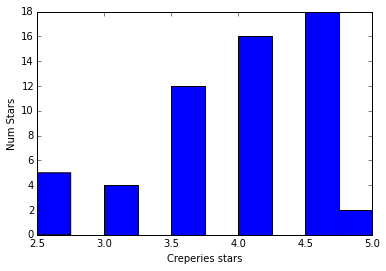

[3.5, 3.5, 2.5, 4.5, 4.0, 4.0, 3.5, 3.0, 3.5, 4.5, 3.5, 4.0, 3.0, 3.5, 1.5, 3.0, 4.5, 4.5, 3.5, 3.5, 4.0, 4.0, 3.5, 4.5, 2.0, 4.0, 3.0, 3.0, 2.5, 3.5, 3.0, 4.0, 4.0, 3.5, 4.0, 3.5, 3.5, 4.5, 3.5, 4.0, 4.0, 5.0, 4.5, 3.5, 4.0, 3.0, 4.5, 4.5, 4.0, 2.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 4.0, 4.0, 3.0, 2.0, 3.5, 5.0, 3.0, 3.5, 3.5, 1.5, 4.0, 1.5, 4.0, 3.0, 3.5, 3.5, 4.0, 3.0, 3.5, 4.0, 4.0, 4.5, 3.5, 3.5, 3.0, 4.0, 4.0, 2.5, 3.5, 3.0, 4.0, 3.5, 2.0, 4.5, 4.0, 4.0, 4.5, 4.0, 4.5, 4.0, 3.5, 3.5, 4.0, 3.0, 4.5, 1.5, 5.0, 3.5, 2.5, 3.5, 2.5, 3.0, 2.5, 4.0, 4.0, 4.0, 4.5, 3.5, 4.0, 4.5, 4.5, 4.0, 4.5, 4.5, 2.5, 2.0, 4.5, 4.5, 2.5, 4.5, 4.0, 4.0, 3.5, 4.0, 4.0, 4.0, 4.5, 2.5, 2.5, 2.5, 4.0, 3.0, 4.0, 3.5, 3.0, 4.5, 4.5, 4.0, 4.5, 3.0, 3.0, 4.0, 2.0, 4.0, 4.5, 5.0, 3.0, 4.5, 5.0, 3.0, 2.5, 4.5, 3.5, 3.5, 4.5, 3.5, 4.0, 3.5, 4.0, 4.5, 4.0, 3.5, 4.0, 3.5, 4.5, 2.0, 2.0, 4.0, 4.0, 3.5, 2.5, 4.0, 3.0, 3.0, 4.0, 3.5]


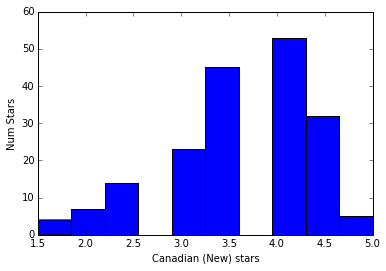

[4.0, 4.0]


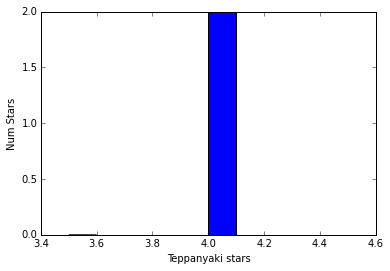

[4.0, 3.5, 2.0, 4.5, 3.0, 4.0, 4.5, 3.5, 3.0, 3.5, 4.0, 3.5, 4.0, 4.0, 2.5, 4.5, 3.5, 3.5, 3.5]


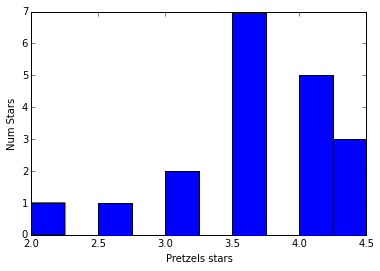

[2.5, 3.0, 4.5, 4.5, 3.5, 3.5, 4.0, 4.0, 4.0, 3.0, 2.0, 3.5, 3.0, 4.0, 4.0, 3.0, 3.5, 3.5, 1.5, 3.5, 2.5, 4.0, 4.5, 4.0, 3.5, 3.5, 4.0, 4.0, 3.0, 3.5, 3.5, 2.5, 4.0, 3.5, 3.0, 4.0, 3.5, 4.0, 4.0, 4.0, 4.0, 3.5, 3.0, 3.0, 4.0, 4.0, 4.0, 4.5, 3.0, 4.0, 4.5, 4.5, 3.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.5, 3.5, 4.0, 4.5, 4.5, 4.5, 4.0, 3.5, 3.5, 4.0, 3.0, 2.5, 4.0, 4.5, 3.5, 4.0, 4.0, 4.0, 4.5, 4.0, 3.0, 5.0, 4.5, 4.0, 3.5, 4.5, 4.0, 3.5, 4.5, 4.5, 3.0, 3.5, 4.5, 4.0]


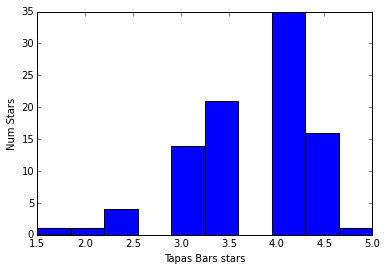

[3.5, 4.5, 4.0, 4.0, 4.5, 4.5, 3.5, 4.0, 5.0, 3.5]


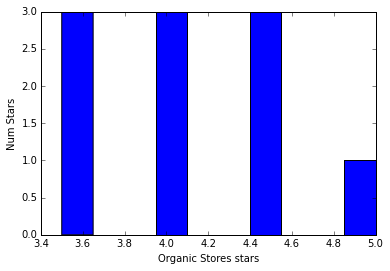

[4.0, 4.0, 3.5, 3.0, 3.5, 5.0, 4.5, 5.0, 4.5, 5.0, 3.5, 2.5, 1.0]


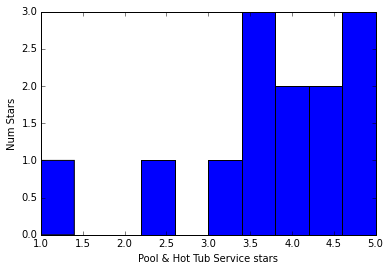

[3.0, 4.0, 4.0, 3.5, 3.0, 4.5, 3.5, 3.5, 4.0, 4.0, 3.5, 4.0, 4.0, 1.5, 4.5, 3.5, 4.5, 3.5, 3.5, 4.0, 4.5, 4.5, 4.0, 3.0, 4.5, 3.5, 4.0, 3.5, 4.0, 5.0, 4.0, 4.5, 4.5, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 5.0, 3.0, 4.5, 3.5, 4.5, 3.5, 3.5, 4.0, 2.5, 4.5, 3.5, 4.0, 3.5, 4.5, 4.5, 5.0, 4.0, 4.0]


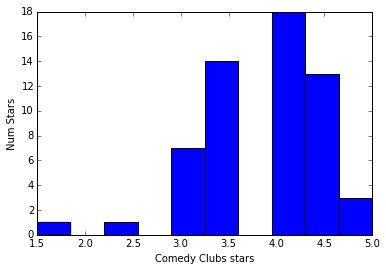

[4.0, 5.0]


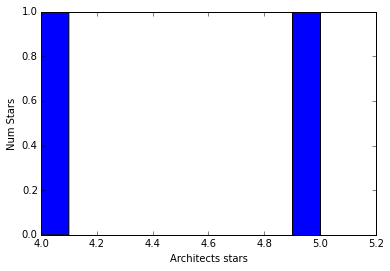

[3.0, 4.0, 4.5, 4.5, 4.0, 4.5, 3.5, 3.5, 5.0, 4.5, 3.0, 4.5, 4.5, 5.0]


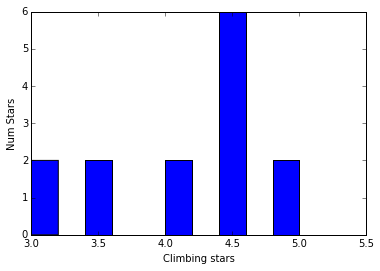

[3.5, 5.0, 4.0, 4.5, 3.5, 3.5, 3.5, 5.0, 3.5, 5.0, 4.5, 5.0, 4.0, 4.5, 4.0, 4.5, 4.0, 3.0, 5.0, 3.5, 3.5, 4.5, 3.5, 3.0, 3.0, 4.0, 4.5, 3.5, 4.0, 4.5, 4.0, 3.5, 3.5, 5.0, 3.0, 4.5, 4.0, 3.5, 4.0, 3.5, 3.5, 4.5, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.5, 4.0, 3.0, 3.5, 3.5, 3.5, 4.0, 3.5, 4.5, 4.5, 4.0, 4.0, 4.0, 3.5, 3.5, 4.5, 3.5, 4.5, 3.5, 2.5, 4.0, 4.5, 4.5, 5.0, 3.0, 4.0, 3.0, 4.5, 4.0, 3.5, 4.0, 5.0, 3.5, 4.5, 4.0, 4.5, 4.5, 4.0, 4.5, 3.5, 3.5, 3.0, 4.5, 5.0, 4.0, 5.0, 5.0, 4.5, 4.5, 5.0, 4.0, 5.0, 4.0, 3.5, 4.5, 4.5, 3.5, 5.0, 5.0, 4.0, 3.5, 3.5, 3.5, 2.5, 4.5, 5.0, 5.0, 5.0, 4.5, 5.0, 4.5, 4.5, 4.5, 3.5, 5.0, 5.0, 4.0, 5.0, 3.0, 5.0, 4.5, 5.0, 3.0, 5.0, 4.5, 4.5, 3.0, 5.0, 4.5, 4.0, 3.5, 4.0, 4.5, 3.5, 3.5, 3.5, 4.0, 4.0, 3.5, 5.0, 4.5, 3.5, 4.0, 5.0, 4.0, 5.0, 5.0, 3.5, 5.0, 5.0, 4.5, 4.5, 5.0, 4.0, 4.0, 5.0, 4.5, 5.0, 5.0, 5.0, 5.0, 4.5, 4.0, 5.0, 5.0, 5.0, 4.5, 2.0, 4.5, 2.5, 5.0, 5.0, 5.0, 3.5, 5.0, 3.5, 4.0, 5.0, 3.5, 1.0, 4.0, 3.5, 4.5, 5.0, 3.0, 4.0, 5.0, 5.0, 4.5, 3.5, 5.0,

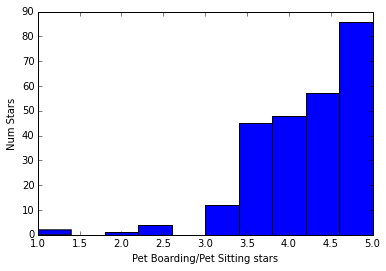

[3.5, 3.5, 3.0, 2.5, 3.5, 4.5, 2.0, 4.0, 3.0, 3.0, 3.5, 4.5, 4.5, 4.0, 4.0, 4.0, 3.5, 4.5, 4.5, 4.5, 3.5, 4.0, 3.0, 4.5, 3.5, 3.5, 3.0, 4.5, 4.0, 3.5, 3.5, 4.0, 3.5, 3.5, 4.0, 3.5, 3.5, 4.5, 2.0, 2.0, 3.0, 3.5, 4.5, 4.0, 3.0, 3.0, 4.5, 2.0, 3.5, 4.0, 3.5, 4.0, 2.5, 4.0, 5.0, 4.5, 3.5, 4.0, 4.0, 4.0, 4.0, 2.5, 4.5, 3.5, 3.5, 4.0, 2.5, 2.5, 3.0, 2.5, 4.5, 3.5, 4.0, 3.5, 3.0, 4.0, 2.5, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 3.5, 2.5, 3.5, 3.5, 3.0, 3.0, 2.5, 3.5, 3.0, 3.5, 4.0, 2.0, 2.5, 3.5, 3.5, 4.5, 4.0, 3.0, 3.0, 3.0, 3.5, 3.5, 3.5, 4.0, 3.5, 4.0, 4.0, 3.0, 3.0, 2.0, 2.5, 5.0, 4.0, 4.5, 2.5, 4.0, 3.0, 3.5, 4.0, 3.0, 3.5, 3.5, 4.0, 3.5, 4.0, 4.0, 4.5, 3.5, 3.5, 4.5, 4.0, 3.5, 4.0, 3.5, 3.0, 3.5, 3.0, 4.0, 3.5, 3.5, 2.5, 3.5, 4.5, 3.5, 2.5, 2.0, 4.0, 3.0, 3.5, 4.0, 2.0, 4.0, 4.0, 3.0, 4.0, 3.5, 3.5, 2.5, 4.5, 3.5, 4.0, 2.5, 3.5, 3.5, 2.0, 3.5, 4.0, 3.0, 4.0, 2.5, 3.0, 3.5, 3.0, 3.5, 2.0, 2.5, 3.0, 4.5, 2.5, 3.0, 4.0, 2.0, 3.0, 2.0, 4.0, 4.0, 3.0, 1.5, 3.0, 1.5, 3.5, 3.0, 3.0, 4.5, 4.5, 4.0,

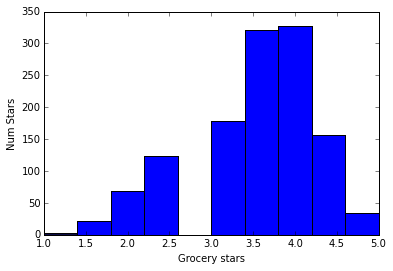

[4.0, 4.5, 3.0, 5.0, 4.0, 2.0, 4.0]


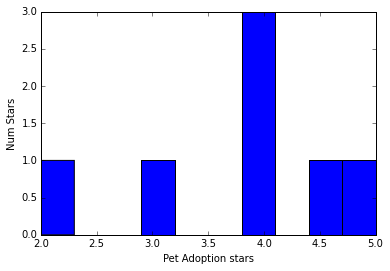

[5.0, 3.5, 4.5, 3.5, 2.5, 2.5, 3.5, 4.5, 4.0, 4.5, 4.0, 2.5, 3.5, 4.0, 4.0, 3.5, 4.5, 3.5, 4.5, 3.5, 5.0, 4.5, 5.0, 3.0, 4.0, 3.5, 2.0, 3.5, 2.0, 3.0, 3.0, 3.0, 4.5, 4.0, 3.5, 2.5, 3.0, 4.0, 4.0, 4.0, 4.5, 3.5, 4.5, 4.0, 4.0, 3.5, 4.5, 4.0, 4.5, 5.0, 3.5, 4.5, 4.5, 4.5, 5.0, 2.0, 2.5, 3.5, 4.5, 4.0, 4.5, 3.5, 5.0, 3.0, 4.0, 4.0, 4.5, 4.5, 5.0, 5.0, 4.5, 4.0, 4.0, 5.0, 4.0, 3.5, 3.5, 4.5, 4.0, 4.5, 3.5, 5.0, 3.5, 4.5, 5.0, 5.0, 4.0, 4.5, 5.0, 3.5, 5.0, 3.0, 4.0, 5.0, 4.5, 5.0, 4.5, 5.0, 4.0, 4.5, 4.5, 5.0, 2.0, 5.0, 4.5, 5.0, 4.0, 3.5, 4.0, 3.5, 4.0, 4.0, 3.5, 4.5, 3.5, 3.0, 3.5, 4.0, 2.5, 3.0, 2.5, 4.0, 2.5, 4.0, 4.5, 4.0, 3.5, 5.0, 5.0, 5.0, 5.0, 3.5, 4.0, 1.0, 5.0, 5.0, 3.5, 4.5, 5.0, 4.0, 4.5, 3.5, 3.5, 4.5, 2.0, 3.5, 1.0, 2.0, 4.0, 3.5, 4.5, 4.5, 2.5, 5.0, 4.5, 5.0, 3.0, 3.5, 5.0, 4.5, 3.0, 5.0, 4.5, 2.5, 5.0, 3.5, 5.0, 2.5, 4.0, 5.0, 3.0, 2.5, 4.0, 4.5, 4.5, 4.5, 3.5, 3.0, 4.0, 4.0, 4.0, 4.5, 5.0, 4.5, 4.5, 3.5, 4.0, 4.0, 4.0, 5.0, 4.5, 5.0, 3.5, 4.5, 2.5, 4.0, 4.5, 3.5, 4.5, 3.5,

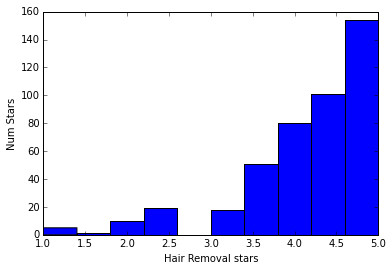

[3.0, 4.0, 3.5, 3.5, 3.5, 2.5, 3.5, 4.0, 4.0, 4.5, 3.5, 4.5, 4.5, 4.0, 4.0, 2.0, 4.0, 4.5, 4.5, 3.5, 4.5, 4.0, 3.5, 4.5, 4.5, 4.0, 3.5, 3.5, 4.5, 3.5, 3.0, 4.5, 3.5, 4.5, 4.5, 4.0, 3.5, 1.5, 5.0, 3.5, 4.5, 3.5, 4.5, 4.5, 3.5, 4.5, 5.0, 4.5, 4.5, 5.0, 4.0, 5.0, 5.0]


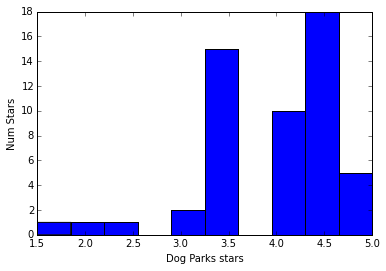

[5.0, 4.5, 2.0, 2.5, 3.0, 4.0, 4.5, 4.0, 3.5, 3.0, 4.5, 4.0, 2.0, 3.5, 3.0, 4.0, 5.0, 4.5, 5.0]


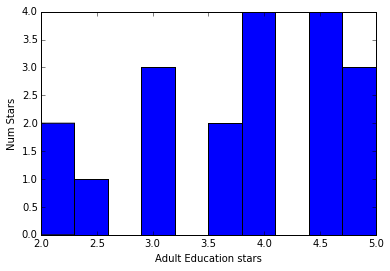

[3.0, 4.0, 3.0, 3.5, 4.5, 5.0, 4.5, 4.0, 4.5, 3.5, 3.0, 3.5, 3.0, 4.5, 4.0, 3.0, 3.0, 4.0, 3.5, 4.5, 3.5, 4.0, 3.5, 4.0, 3.5, 4.5, 4.0, 4.5, 3.5, 5.0, 4.0, 4.5, 4.0, 4.0, 4.0, 3.5, 3.5, 4.0, 4.5, 4.0, 3.5, 4.5, 3.5, 4.0, 4.0, 4.0, 4.0, 4.0, 4.5, 4.5, 4.0, 4.0, 4.0, 4.0, 4.5, 2.5, 3.0, 3.5, 5.0, 4.5, 4.5, 4.0, 4.0, 3.5, 4.5, 3.0, 4.5, 4.5, 4.0, 3.5, 4.0, 4.5, 4.5, 4.0, 4.5, 3.0, 5.0, 3.5, 4.5, 4.5, 4.0, 4.0, 4.0, 5.0, 4.0, 4.5, 4.0, 4.0, 4.0, 4.5, 3.5, 3.5, 5.0, 3.5, 3.0, 4.0, 4.5, 5.0, 4.0, 4.5, 3.5, 4.5, 5.0]


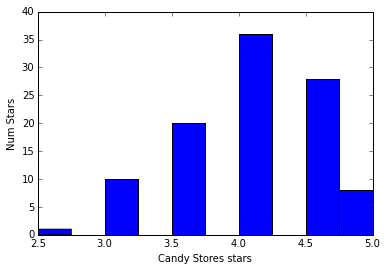

[4.5, 4.0, 3.5, 4.5, 3.5, 2.5, 4.5, 5.0, 2.5, 3.5, 4.5, 5.0, 2.5, 2.5, 5.0, 4.0, 3.0, 3.5, 3.5, 3.0, 3.5, 4.5, 3.5, 3.5, 3.5, 3.5, 4.5, 4.5, 3.0, 3.5, 3.5, 3.5, 4.0, 3.5, 4.5, 4.5, 3.5, 4.5, 4.0, 3.5, 4.0, 5.0, 2.5, 4.0, 4.5, 4.0, 3.5, 4.0, 3.5, 4.0, 4.5, 5.0, 3.5, 4.5, 4.5, 4.5, 5.0, 2.0, 3.0, 3.0, 3.5, 3.5, 2.5, 4.0, 3.5, 2.5, 4.5, 5.0, 4.0, 4.0, 3.5, 2.5, 4.5, 4.0, 4.5, 4.5, 3.5, 4.5, 2.5, 4.5, 4.0, 4.0, 4.5, 5.0, 5.0, 4.5, 4.0, 5.0, 5.0, 4.0, 1.0, 5.0, 4.5, 4.0, 4.5, 3.5, 5.0, 5.0, 3.5, 4.5, 4.5, 4.5, 4.5, 2.5, 3.5, 3.0, 3.0]


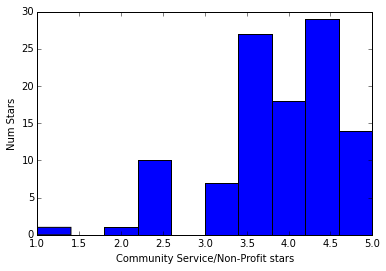

[4.5, 3.5, 3.5, 3.5, 3.5, 4.5, 3.0, 4.0, 4.5, 2.5, 3.5, 2.5, 4.0, 4.0, 4.0, 5.0, 3.5, 3.5, 3.0, 3.0, 4.0, 2.5, 3.0, 2.5, 3.0, 3.5, 3.5, 3.5, 3.0, 3.0, 3.0, 3.5, 3.5, 4.0, 3.0, 2.5, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 3.5, 3.0, 4.0, 3.5, 4.0, 3.0, 5.0, 3.5, 3.5, 4.0, 3.0, 5.0, 4.0, 4.5, 3.5, 3.5, 3.5, 3.0, 3.5, 3.0, 3.0, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.5, 5.0, 2.0, 3.0, 4.0, 5.0, 4.5]


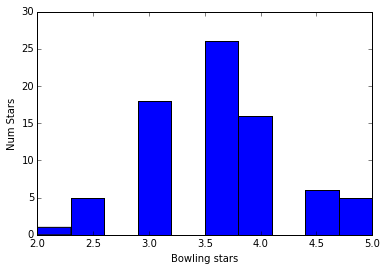

[4.5, 4.0, 3.5, 4.0, 4.5, 4.0, 3.5, 3.5, 2.5, 4.0, 3.5, 2.0, 2.5, 2.0, 3.5, 3.5, 3.0, 3.5, 2.5, 2.5, 2.5, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 1.0, 4.0, 3.5, 5.0, 4.5, 3.0, 4.0, 4.0, 2.5, 2.5, 5.0, 3.0, 3.5, 2.5, 4.0, 3.0, 3.5, 3.0, 4.5, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.5, 4.0, 3.0, 4.5, 2.5, 3.0, 3.0, 4.0, 3.5, 1.5, 4.0, 4.0, 5.0, 3.5, 3.5, 4.5, 4.0, 3.5, 3.5, 4.0, 2.5, 4.5, 3.0, 3.5, 4.0, 3.5, 3.0, 3.0, 2.5, 3.0, 3.0, 3.5, 3.5, 2.5, 3.5, 3.5, 3.5, 4.0, 4.0, 4.5, 3.5, 2.5, 3.0, 2.5, 3.5, 2.5, 4.5, 3.0, 3.5, 5.0, 3.5, 4.5, 4.0, 3.0, 2.5, 3.5, 3.5, 2.5, 3.0, 3.0, 4.0, 4.0, 3.5, 3.5, 4.0, 3.0, 2.5, 2.5, 3.5, 3.5, 3.5, 3.5, 3.0, 1.5, 4.5, 2.5, 3.5, 3.0, 4.5, 3.0, 2.5, 4.0, 4.0, 4.0, 3.5, 4.0, 3.5, 4.0, 3.0, 2.5, 2.0, 3.5, 3.0, 4.0, 3.0, 4.0, 3.5, 3.5, 1.5, 2.5, 3.0, 2.5, 2.5, 3.5, 3.5, 3.5, 2.5, 4.0, 4.0, 3.0, 3.0, 3.5, 3.0, 2.5, 3.5, 3.5, 4.0, 3.5, 4.0, 4.0, 4.0, 4.0, 4.5, 3.5, 4.0, 3.5, 3.5, 4.0, 2.5, 4.0, 3.5, 3.5, 4.0, 3.0, 4.0, 3.5, 3.5, 4.0, 3.5, 3.0, 4.0, 3.0, 4.0, 4.5, 4.0, 3.5,

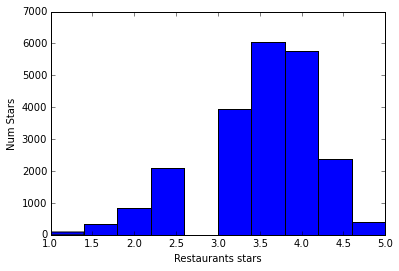

[3.0, 5.0, 5.0, 5.0, 3.5, 5.0, 3.0, 5.0, 5.0, 3.5, 5.0, 4.0, 5.0, 4.5, 4.0, 5.0, 4.5, 4.0, 4.5, 3.0, 5.0, 5.0, 5.0, 5.0, 4.5, 5.0, 5.0, 5.0, 5.0, 5.0, 3.5, 2.5, 5.0, 5.0, 5.0]


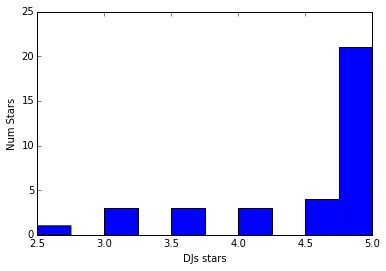

[3.5, 4.5, 3.0, 3.0, 4.0, 3.5, 3.0, 3.5, 3.5, 4.0, 4.0, 1.5, 4.0, 3.0, 3.5, 4.0, 4.5, 5.0, 2.5, 3.0, 4.5, 3.5, 3.5, 4.0, 5.0, 3.0, 4.5, 3.5, 3.0, 4.0, 1.5, 3.5, 5.0, 3.0, 4.5, 3.0, 2.5, 4.0, 3.0, 4.5, 3.5, 2.5, 4.5]


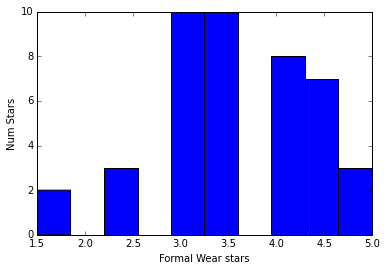

[4.0, 5.0, 4.5, 5.0, 4.5, 5.0, 5.0, 4.5, 4.5, 4.5, 5.0, 4.5, 4.5, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, 4.5, 4.0, 4.0, 5.0, 5.0, 5.0, 4.0, 3.5, 4.0, 4.5, 4.0, 4.0, 4.5, 5.0, 4.5, 4.0, 4.5, 3.5, 3.5, 5.0, 3.5, 3.5, 5.0, 5.0, 3.5, 3.0, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 3.5, 3.5, 4.5, 4.5, 4.5, 4.0, 4.5, 4.5, 4.0, 4.5, 4.0, 4.0, 5.0, 5.0, 4.5, 4.5, 4.5, 5.0, 5.0, 4.5]


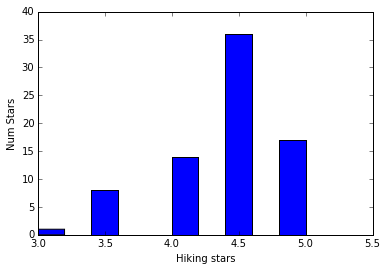

[4.0, 5.0]


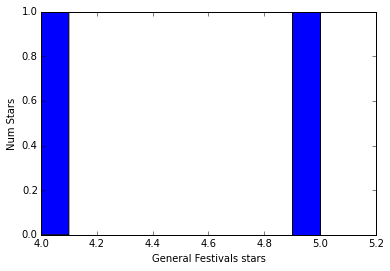

[3.0, 2.5, 4.0, 5.0, 4.0, 2.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


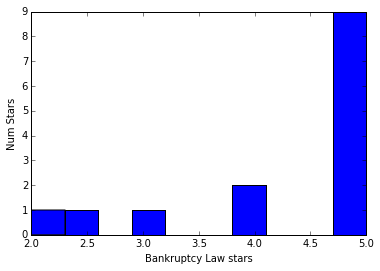

[4.5, 4.5, 4.5]


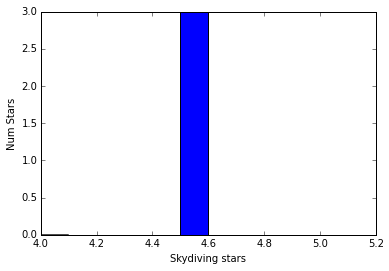

[5.0, 3.5, 3.5, 3.0, 4.0, 4.5, 3.5, 4.5, 4.0, 3.5, 4.0, 3.0, 2.5, 4.0, 3.0, 4.0, 3.5, 3.5, 3.0, 3.5, 4.5, 3.5, 3.0, 4.0, 4.0, 3.5, 5.0, 3.5, 4.0, 2.5, 4.5, 4.5, 4.5, 3.0, 3.5, 3.5, 3.0, 4.5, 4.0, 4.5, 4.5, 3.0, 3.5, 3.5, 4.0, 3.5, 4.5, 4.5, 3.5, 3.5, 2.5, 2.0, 3.5, 2.5, 3.5, 3.0, 3.5, 3.5, 4.5, 3.0, 3.0, 3.0, 3.5, 4.5, 4.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 5.0, 4.0, 3.5, 3.5, 4.0, 4.0, 4.0, 4.0, 4.0, 4.5, 5.0, 4.0, 5.0, 3.5, 4.0, 5.0, 4.0, 4.5, 3.5, 4.0, 4.5, 3.5, 3.5, 4.0, 3.0, 2.5, 5.0, 3.5, 3.0, 3.0, 4.0, 3.5, 3.0, 2.5, 3.0, 4.5, 3.5, 2.5, 4.5, 3.5, 3.5, 4.0, 3.5, 4.0, 4.0, 3.5, 3.5, 3.0, 4.0, 4.0, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 2.5, 4.0, 3.0, 2.5, 4.0, 3.0, 3.0, 3.0, 4.5, 4.5, 3.0, 3.5, 4.5, 3.5, 4.5, 4.0, 3.5, 3.0, 3.0, 3.0, 3.5, 3.5, 4.5, 4.0, 3.5, 3.5, 4.0, 3.5, 4.0, 2.5, 3.5, 3.0, 3.0, 4.0, 4.5, 4.0, 4.0, 3.5, 3.0, 4.0, 4.5, 4.5, 3.5, 3.0, 4.0, 3.5, 4.0, 3.5, 3.0, 3.0, 4.5, 4.0, 3.0, 3.5, 4.0, 3.5, 3.5, 4.0, 3.0, 4.0, 3.5, 3.5, 4.5, 3.5, 3.0, 3.5, 3.5, 3.0, 4.0, 4.5, 4.5, 3.5, 4.0,

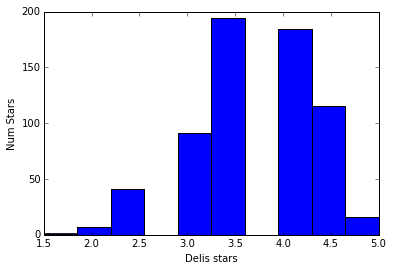

[2.5, 3.0, 2.5]


KeyboardInterrupt: 

In [31]:
elements = set()
for element_list in biz_df['categories']:
    elements = elements.union(set(element_list))
    
category_dist = {key:[] for key in elements}
for i in range(len(biz_df)):
    row = biz_df.ix[i]
    star = row['stars']
    cats = row['categories']
    for cat in cats:
        category_dist[cat].append(star)

import matplotlib.pyplot as plt
for category in category_dist.keys():
    distribution = category_dist[category]
    print distribution
    if len(distribution) > 1:
        plt.hist(distribution)
        plt.xlabel('{0} stars'.format(category))
        plt.ylabel('Num Stars')
        plt.show()
    else:
        print("Category {0} only has 1 data point. That point is: {1}".format(category,distribution[0]))

# Suprises

Reviews: In the reviews we found that people have a tendency to give restaurants higher reviews (greater than 3) than lower reviews. Also interesting 